In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter, FormatStrFormatter
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager
from matplotlib import dates as mdates

import requests
import json

In [2]:
#add in custom fonts
font_dir = "../fonts/"
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

title_font = FontProperties()
title_font.set_name("Lora")
title_font.set_size(16)

main_font = FontProperties()
main_font.set_name("Quicksand")
main_font.set_size(12)
main_font.set_weight(weight = "light")

plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = main_font.get_name()

def f(x):
    return 1/(1+np.exp(-x))

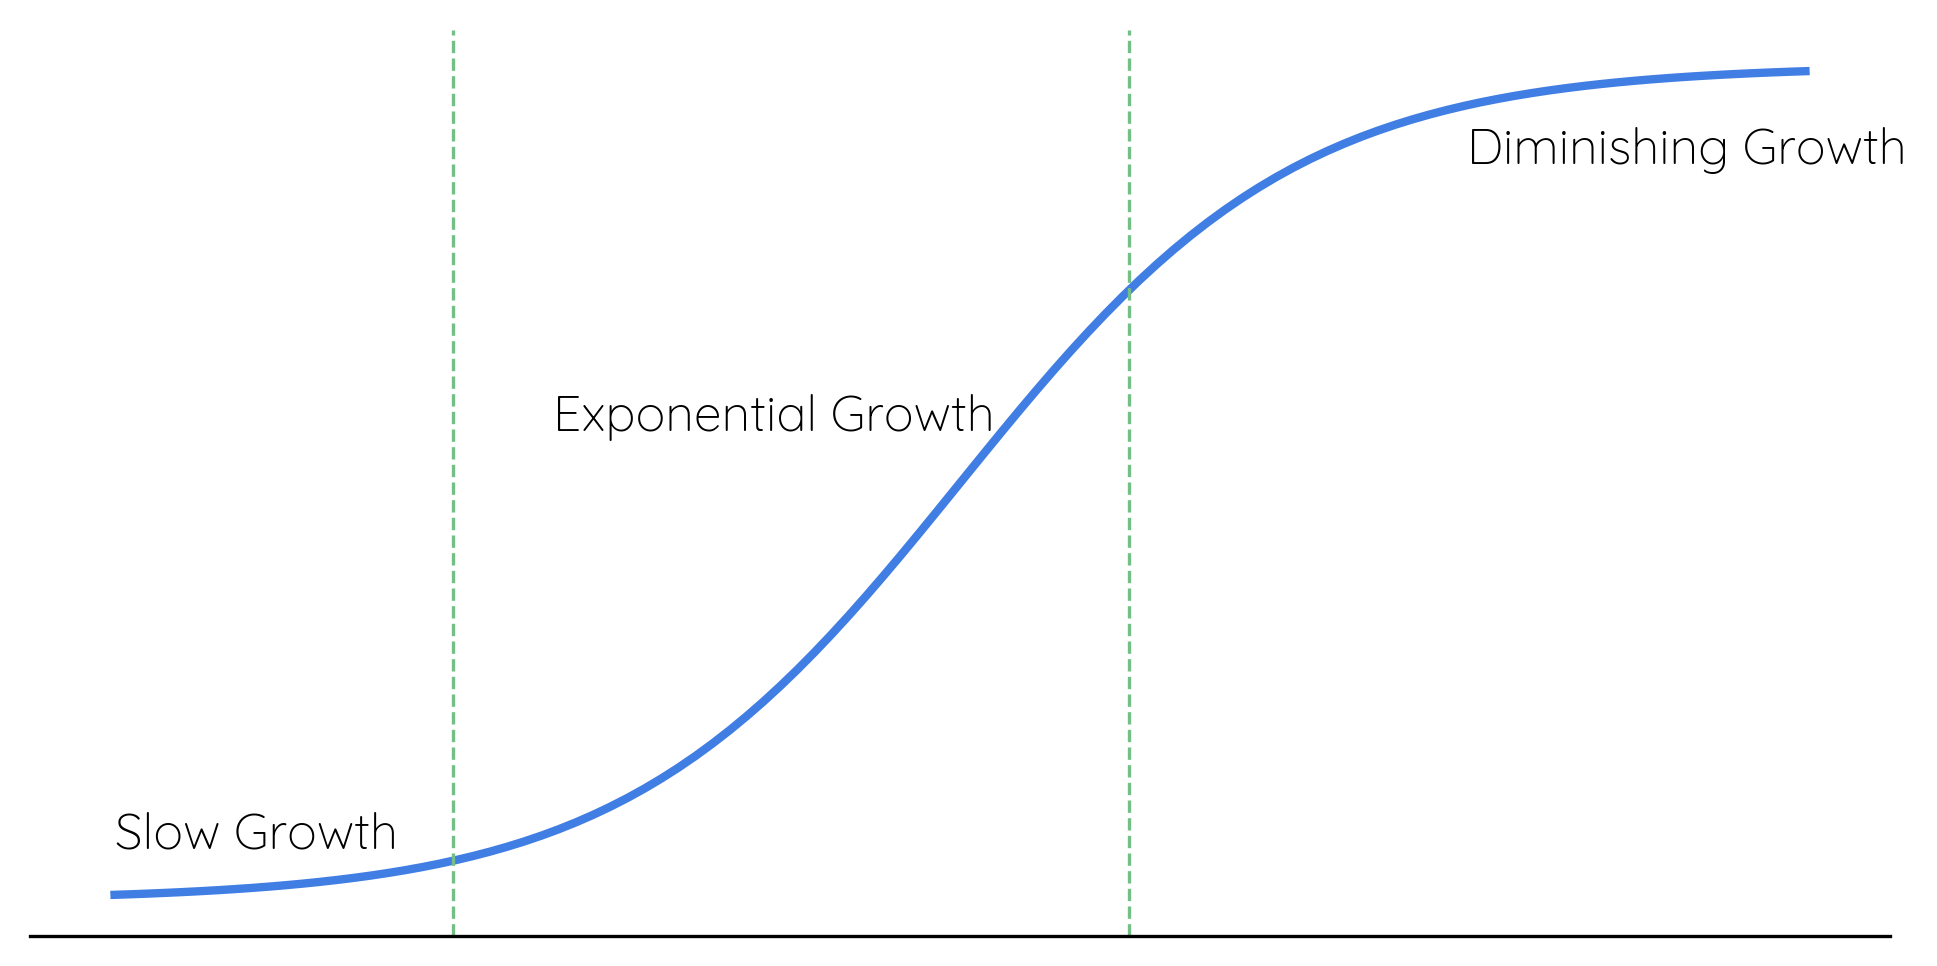

In [4]:
x = np.linspace(-5,5,100)
y = f(x)



plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots()
ax.plot(x,y, color=palate["deep"], linewidth=2)

# remove ticks and tick labels form axes
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

# remove top and right borders
ax.spines[["top", "right", "left"]].set_visible(False)

# annotatations
ax.axvline(-3, color=palate["money"], linewidth=0.8, linestyle="--")
ax.axvline(1, color=palate["money"], linewidth=0.8, linestyle="--")

ax.text(-5, 0.05, "Slow Growth", color="black", font=main_font, ha = "left", va = "bottom")
ax.text(-1.1, 0.55, "Exponential Growth", color="black", font=main_font, ha = "center", va = "bottom")
ax.text(3, 0.87, "Diminishing Growth", color="black", font=main_font, ha = "left", va = "bottom")

plt.savefig("plots/logistic_function.png", dpi=300, bbox_inches="tight")

In [7]:
# pull womens LFPR & GDP data from FRED api
api_key = ""

def get_fred_series(api_key, series_id):
    url = "https://api.stlouisfed.org/fred/series/observations"
    params = {
        "series_id": series_id,
        "api_key": api_key, 
        "file_type": "json"}
    res = requests.get(url, params=params)
    return json.loads(res.text)

In [8]:
female_lfpr = pd.DataFrame(get_fred_series(api_key, "LNS11300002")["observations"])
female_lfpr = female_lfpr[["date", "value"]]

female_lfpr["date"] = pd.to_datetime(female_lfpr.date)
female_lfpr = female_lfpr.rename({"value": "lfpr_women"}, axis = 1)

female_lfpr.lfpr_women = female_lfpr.lfpr_women.astype("float")

gdp = pd.DataFrame(get_fred_series(api_key, "GDP")["observations"])
gdp = gdp[["date", "value"]]

gdp.date = pd.to_datetime(gdp.date)
gdp = gdp.rename({"value": "gdp"}, axis = 1)

gdp = gdp[~(gdp.gdp == ".")].reset_index(drop = True)
gdp.gdp = gdp.gdp.astype(float)

print(female_lfpr.head())
print(gdp.head())

        date  lfpr_women
0 1948-01-01        32.0
1 1948-02-01        32.4
2 1948-03-01        32.1
3 1948-04-01        33.0
4 1948-05-01        32.0
        date      gdp
0 1947-01-01  243.164
1 1947-04-01  245.968
2 1947-07-01  249.585
3 1947-10-01  259.745
4 1948-01-01  265.742


In [95]:
gdp.to_csv("data/US_GDP.csv")
female_lfpr.to_csv("data/FEMALE_LFPR.csv")

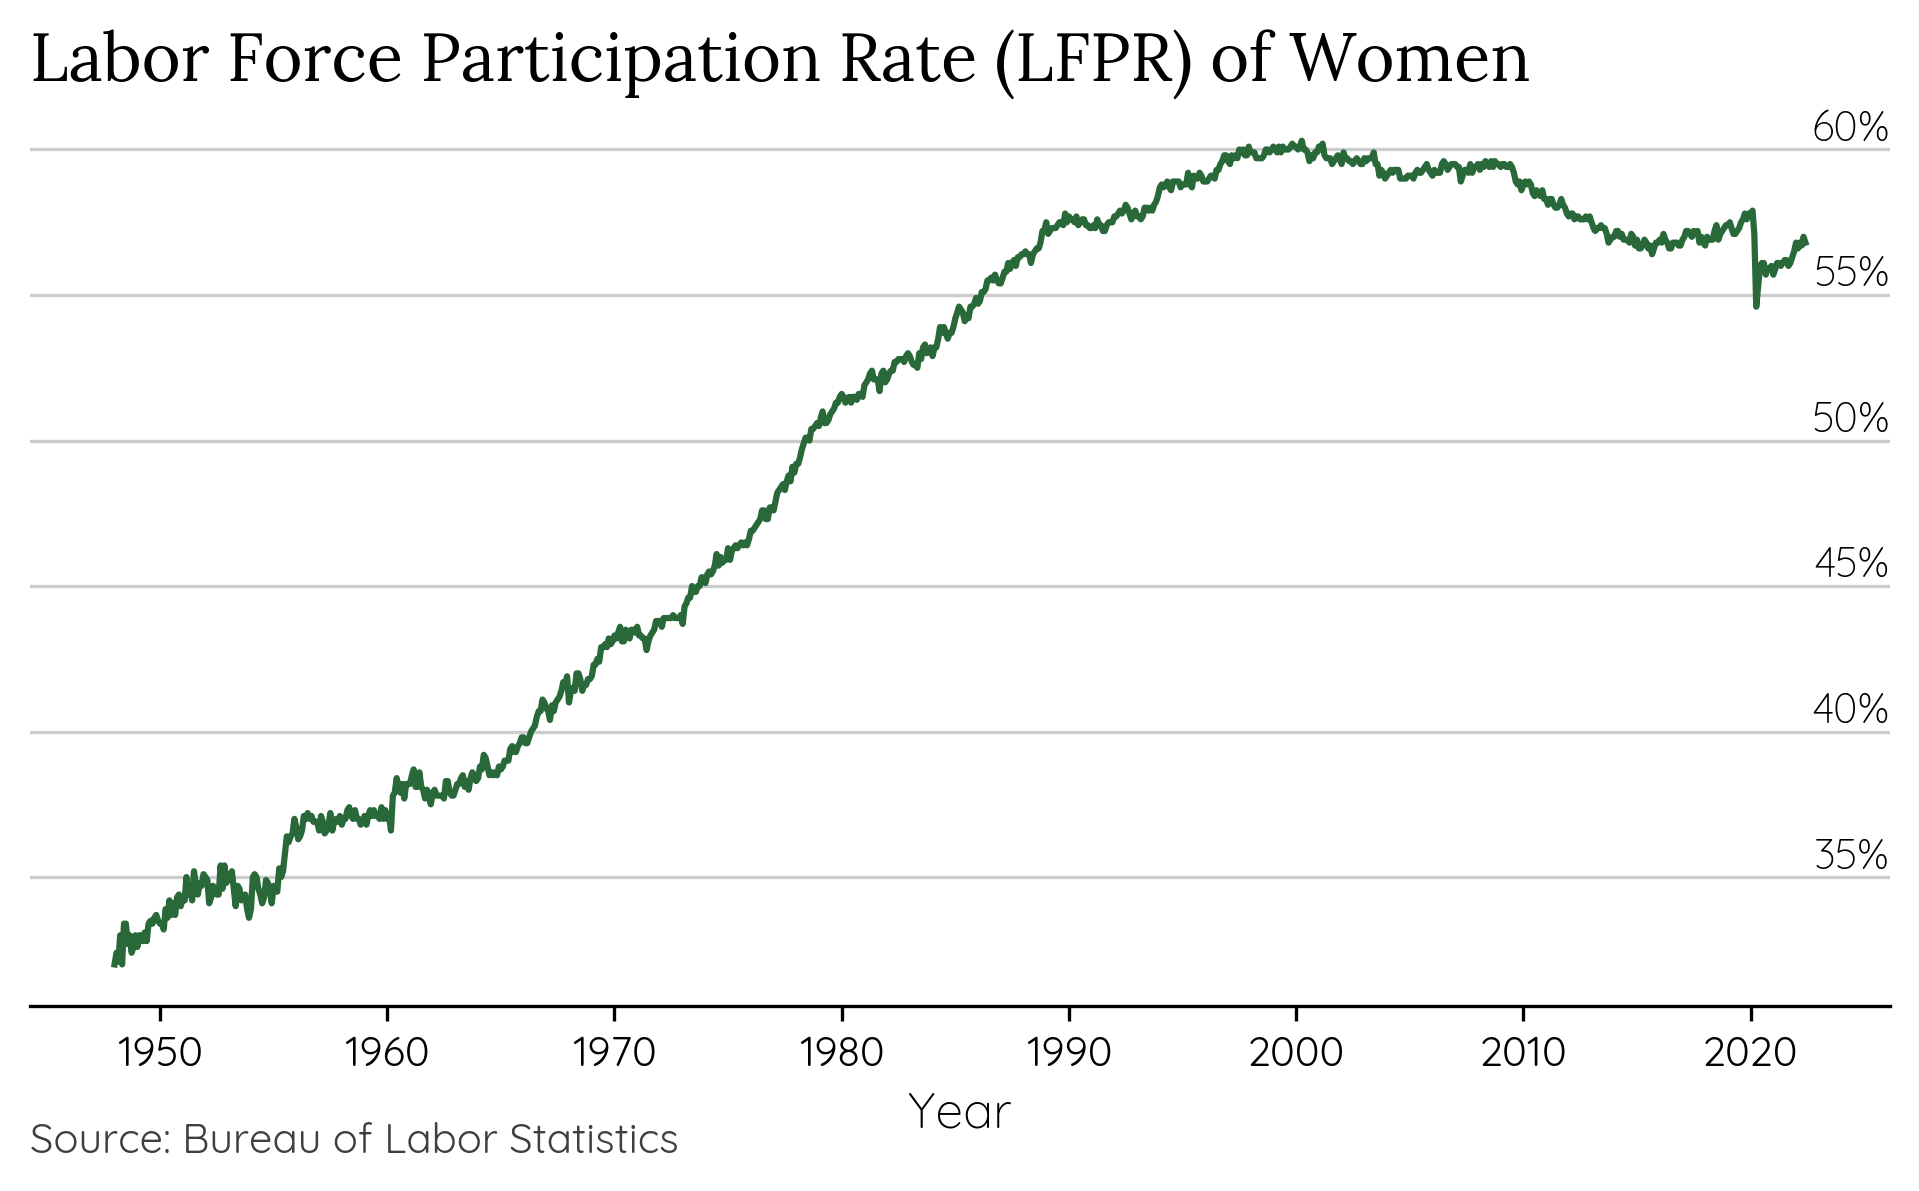

In [20]:
female_lfpr = pd.read_csv("data/FEMALE_LFPR.csv", index_col=0, parse_dates=["date"])

fig, ax = plt.subplots()
ax.plot(female_lfpr.date, female_lfpr.lfpr_women, color = palate["forest"])

# change grid
ax.grid(color = "gray", alpha = 0.4, axis  = "y")

#find positions
left, right = ax.get_xlim()
bottom, top = ax.get_ylim()

#add titles and years
ax.set_xlabel("Year", font = main_font)

ax.text(left, top,
    "Labor Force Participation Rate (LFPR) of Women", 
    font = title_font, va = "bottom")

# format yaxis with percent style


# turn off top and right spines 
ax.spines[["top", "right", "left"]].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.yaxis.set_ticklabels([])


for percent in np.arange(35, 61, 5):
    ax.text(right, percent, str(percent) + "%", 
        color="black", 
        ha= "right", 
        va="bottom",
        font=main_font,
        fontsize = 10)

ax.text(left, bottom - 4, 
    "Source: Bureau of Labor Statistics", 
    ha = "left", va = "top", alpha = 0.75)


plt.show()

In [ ]:
fmt = "%.0f%%"
ax.yaxis.set_major_formatter(FormatStrFormatter(fmt))

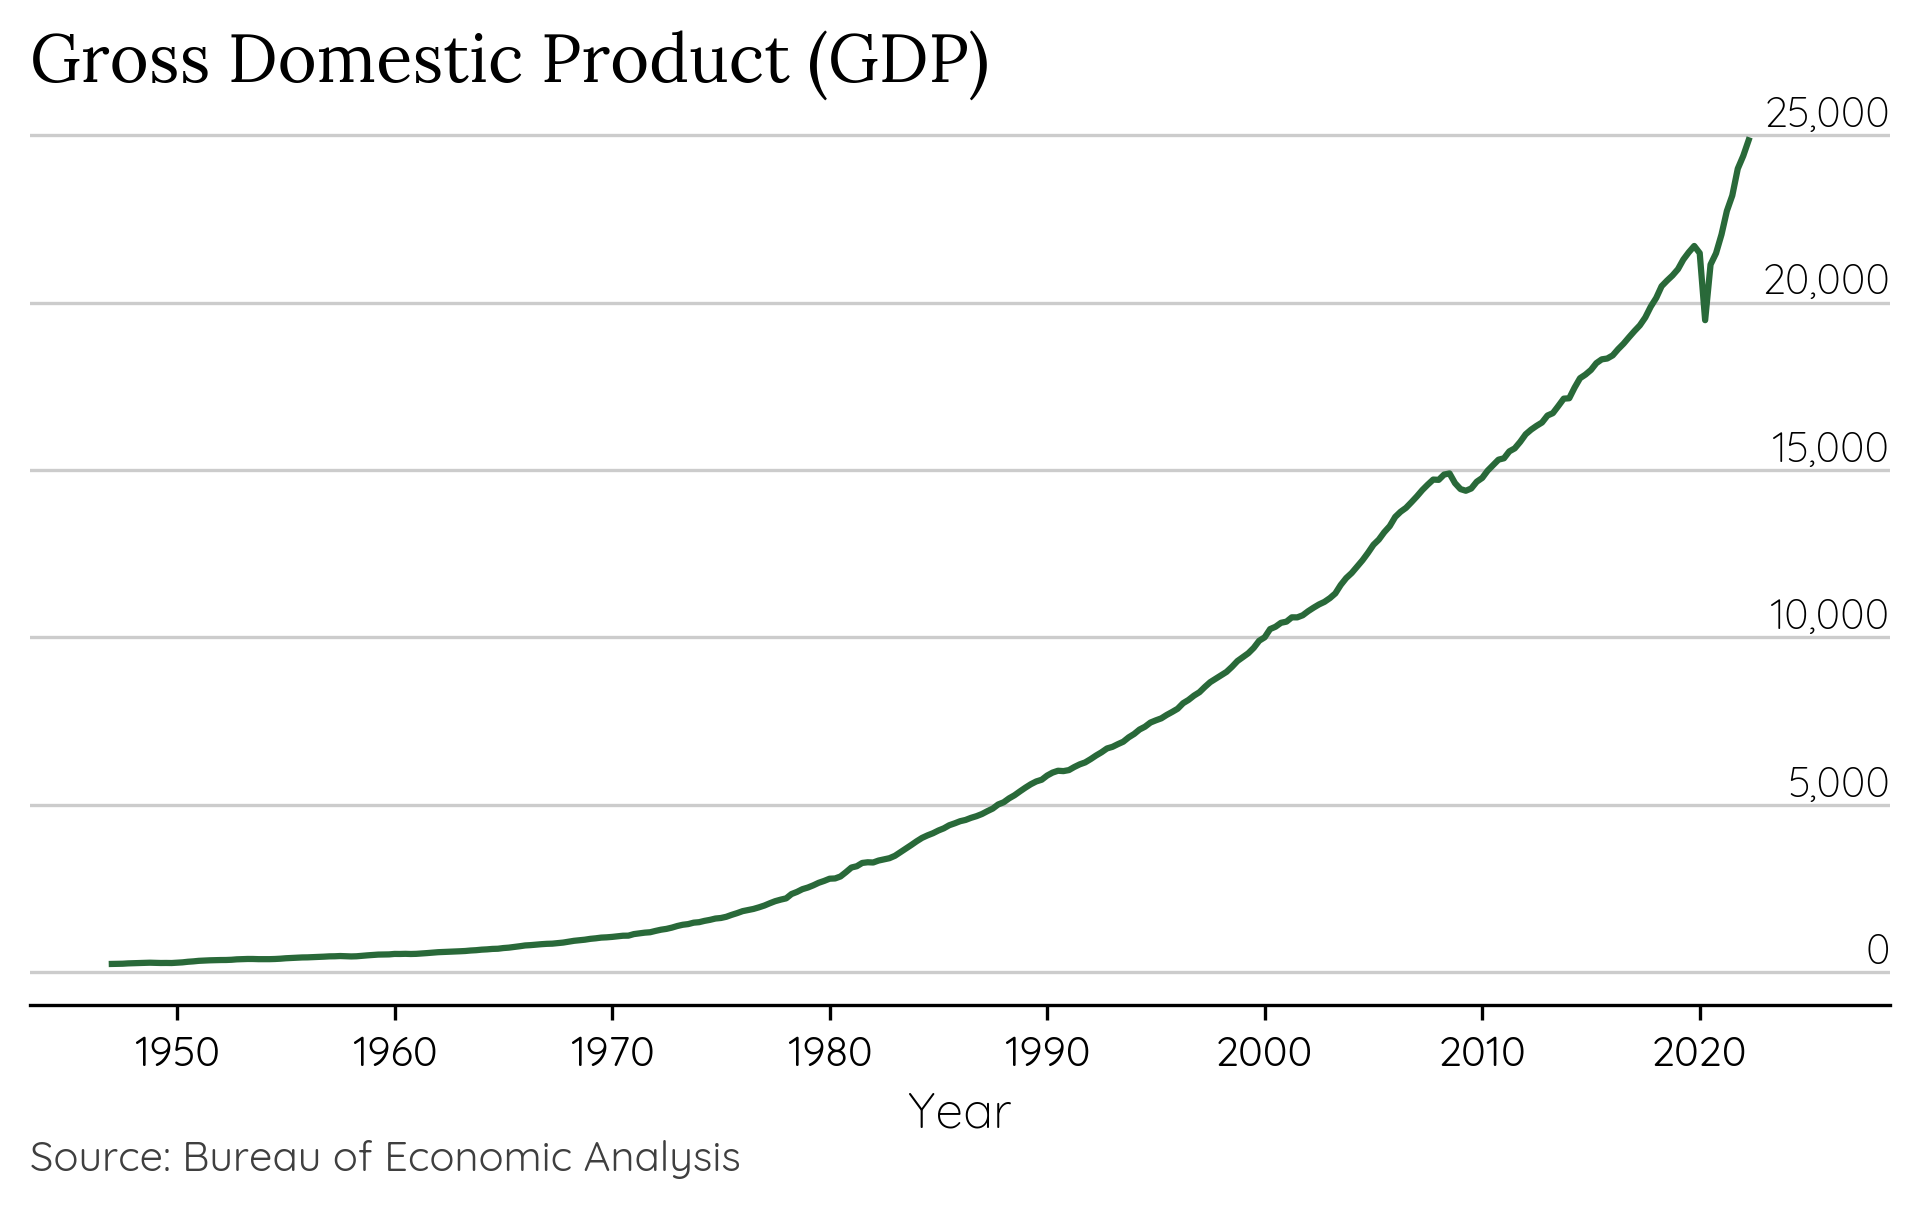

In [21]:
gdp = pd.read_csv("data/US_GDP.csv", index_col=0, parse_dates=["date"])

plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = main_font.get_name()

fig, ax = plt.subplots()
ax.plot(gdp.date, gdp.gdp, color = palate["forest"])

#change grid
ax.grid(color = "gray", alpha = 0.4, axis  = "y")

#find positions
left, right = ax.get_xlim()
bottom, top = ax.get_ylim()

#add titles and years
ax.set_xlabel("Year", font = main_font)

ax.text(left, top,
    "Gross Domestic Product (GDP)", 
    font = title_font, va = "bottom")


# turn off top and right spines 
ax.spines[["top", "right", "left"]].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.yaxis.set_ticklabels([])

for label in np.arange(0, 25000 + 1, 5000):
    ax.text(right + 1000, label, f"{label:,}", 
        color="black", 
        ha= "right", 
        va="bottom",
        font=main_font,
        fontsize = 10)

ax.text(left, bottom - 4000, 
    "Source: Bureau of Economic Analysis", 
    ha = "left", va = "top", alpha = 0.75)

ax.set_xlim(left = left, right = right + 1000)

plt.savefig("plots/gdp.png", bbox_inches = "tight")

In [176]:
labor_prod = pd.read_excel("data/labor-productivity-major-sectors.xlsx", sheet_name="MachineReadable")

In [177]:
#filters
labor_prod = labor_prod[labor_prod.Sector == "Nonfarm business"]
labor_prod = labor_prod[labor_prod.Measure == "Labor productivity"]
labor_prod = labor_prod[labor_prod.Units == "Index (2012=100)"]
labor_prod = labor_prod[labor_prod.Qtr != "Annual"]
labor_prod = labor_prod.reset_index(drop = True)
labor_prod = labor_prod[["Year", "Qtr", "Value"]]

labor_prod["Qtr"] = labor_prod.Qtr.astype(int)
labor_prod["Value"] = labor_prod.Value.astype(float)

In [179]:
#reindex to start at 1947
labor_prod.to_csv("data/labor_productivity.csv")

In [187]:
def reindex(index, start_idx):
    start_value = index[start_idx]
    return index/start_value * 100

labor_prod.Value = reindex(labor_prod.Value, 0)

In [191]:
real_hourly_comp = pd.read_excel("data/labor-productivity-major-sectors.xlsx", sheet_name="MachineReadable")

In [192]:
real_hourly_comp = real_hourly_comp[real_hourly_comp.Sector == "Nonfarm business"]
real_hourly_comp = real_hourly_comp[real_hourly_comp.Measure == "Real hourly compensation"]
real_hourly_comp = real_hourly_comp[real_hourly_comp.Units == "Index (2012=100)"]
real_hourly_comp = real_hourly_comp[real_hourly_comp.Qtr != "Annual"]
real_hourly_comp = real_hourly_comp.reset_index(drop = True)
real_hourly_comp = real_hourly_comp[["Year", "Qtr", "Value"]]

real_hourly_comp

,Year,Qtr,Value
0,1947,1,35.824
1,1947,2,36.121
2,1947,3,36.401
3,1947,4,36.236
4,1948,1,36.324
...,...,...,...
296,2021,1,114.849
297,2021,2,115.152
298,2021,3,115.035
299,2021,4,115.726


In [193]:
real_hourly_comp.to_csv("data/real_hourly_comp_2012_indexed.csv")

In [195]:
real_hourly_comp.Value = reindex(real_hourly_comp.Value, 0)

In [202]:
real_hourly_comp.rename(columns = {"Value": "Real Hourly Compensation"}, inplace = True)
labor_prod.rename(columns = {"Value": "Labor Productivity"}, inplace = True)

In [203]:
labor_prod["date"] = pd.PeriodIndex(labor_prod.Year.astype(str) + "-Q" + labor_prod.Qtr.astype(str), freq = "Q").to_timestamp()
real_hourly_comp["date"] = pd.PeriodIndex(real_hourly_comp.Year.astype(str) + "-Q" + real_hourly_comp.Qtr.astype(str), freq = "Q").to_timestamp()
labor_prod

,Year,Qtr,Labor Productivity,date
0,1947,1,100.000000,1947-01-01
1,1947,2,102.283203,1947-04-01
2,1947,3,99.147030,1947-07-01
3,1947,4,103.338646,1947-10-01
4,1948,1,103.799595,1948-01-01
...,...,...,...,...
296,2021,1,481.062336,2021-01-01
297,2021,2,484.913626,2021-04-01
298,2021,3,480.080128,2021-07-01
299,2021,4,487.515616,2021-10-01


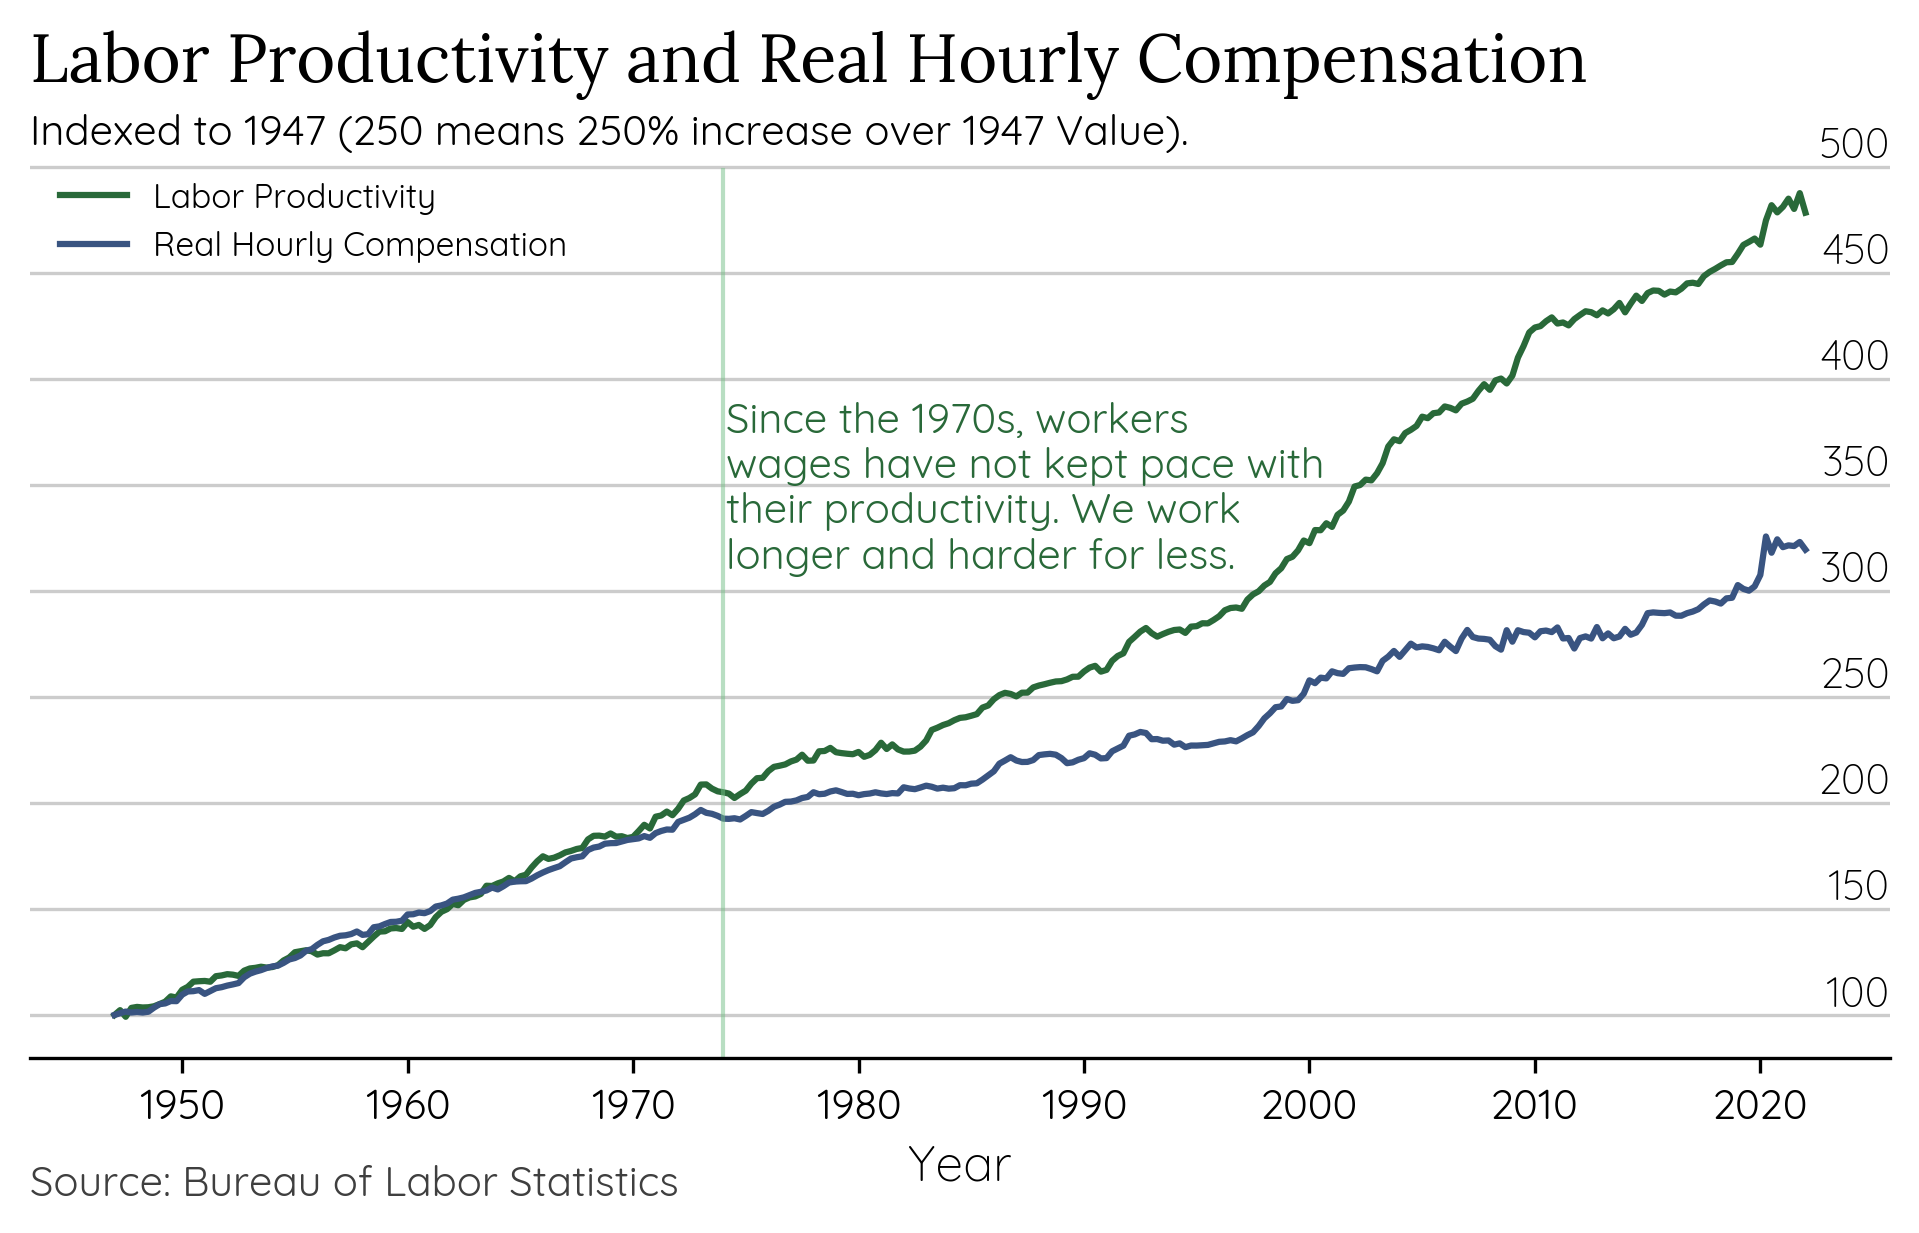

In [286]:
labor_prod = pd.read_csv("data/labor_productivity.csv", index_col=0, parse_dates=["date"])
labor_prod["Labor Productivity"] = reindex()

plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = main_font.get_name()

fig, ax = plt.subplots()
ax.plot(labor_prod.date, labor_prod["Labor Productivity"], color = palate["forest"], label = "Labor Productivity")
ax.plot(real_hourly_comp.date, real_hourly_comp["Real Hourly Compensation"], color = palate["navy"], label = "Real Hourly Compensation")

#change grid
ax.grid(color = "gray", alpha = 0.4, axis  = "y")

#find positions
left, right = ax.get_xlim()
bottom, top = ax.get_ylim()

#add titles and years
ax.set_xlabel("Year", font = main_font)

ax.text(left, top + 25,
    "Labor Productivity and Real Hourly Compensation", 
    font = title_font, va = "bottom")

ax.text(left, top,
    "Indexed to 1947 (250 means 250% increase over 1947 Value).", 
    va = "bottom")


# turn off top and right spines 
ax.spines[["top", "right", "left"]].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.yaxis.set_ticklabels([])

for label in np.arange(100, 500 + 1, 50):
    ax.text(right, label, f"{label:,}", 
        color="black", 
        ha= "right", 
        va="bottom",
        font=main_font,
        fontsize = 10)

ax.text(left, bottom - 50, 
    "Source: Bureau of Labor Statistics",
    ha = "left", va = "top", alpha = 0.75)

ax.set_xlim(left = left, right = right)
ax.axvline(x = 1460, color = palate["money"], alpha = 0.5,
    linestyle = "-" , linewidth = 1, ymax = 0.98)


annotation_text = (
    "Since the 1970s, workers\n"
    "wages have not kept pace with\n"
    "their productivity. We work\n"
    "longer and harder for less."
)

ax.text(1500, 307,
    annotation_text, ha = "left", va = "bottom",
    color = palate["forest"], fontsize = 10)

ax.legend(frameon=False, fontsize = 8, loc = "upper left")

plt.savefig("plots/prod_vs_wages.png", bbox_inches = "tight")

In [242]:
mdates.date2num(np.datetime64('1973-12-31'))


1460.0

In [233]:
ax.get_xlim()

(-9770.7, 20362.7)